In [16]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime
from config import weather_api_key
from citipy import citipy

In [17]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90,high=90,size=1500)
lngs=np.random.uniform(low=-180,high=180,size = 1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [18]:
#Add the latitudes and longitudes in a list.
coordinates = list(lat_lngs)

In [19]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

600

In [20]:
#Build basic URL for the OpenWeatherMap with your weather_api_key added to the URL
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID='+weather_api_key

In [21]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print('Beginning Data Retrieval     ')
print('-----------------------------')

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | hajnowka
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | lethem
Processing Record 6 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | guerrero negro
Processing Record 9 of Set 1 | trincomalee
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | sorland
Processing Record 12 of Set 1 | machacamarca
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | belyy yar
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 20 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 21 of Set 1 

Processing Record 38 of Set 4 | bar harbor
Processing Record 39 of Set 4 | viligili
City not found. Skipping...
Processing Record 40 of Set 4 | bilma
Processing Record 41 of Set 4 | paita
Processing Record 42 of Set 4 | anadyr
Processing Record 43 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 44 of Set 4 | tuxpan
Processing Record 45 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 46 of Set 4 | san miguelito
Processing Record 47 of Set 4 | puerto escondido
Processing Record 48 of Set 4 | nago
Processing Record 49 of Set 4 | firminy
Processing Record 50 of Set 4 | atambua
Processing Record 1 of Set 5 | yibin
Processing Record 2 of Set 5 | raudeberg
Processing Record 3 of Set 5 | shahr-e babak
Processing Record 4 of Set 5 | pangnirtung
Processing Record 5 of Set 5 | taywarah
Processing Record 6 of Set 5 | abalak
Processing Record 7 of Set 5 | qaanaaq
Processing Record 8 of Set 5 | norman wells
Processing Record 9 of Set 5 | yar-sale
Processing

Processing Record 30 of Set 8 | husavik
Processing Record 31 of Set 8 | enterprise
Processing Record 32 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 33 of Set 8 | lavrentiya
Processing Record 34 of Set 8 | nemuro
Processing Record 35 of Set 8 | guaraniacu
Processing Record 36 of Set 8 | falmouth
Processing Record 37 of Set 8 | ribeira grande
Processing Record 38 of Set 8 | satitoa
City not found. Skipping...
Processing Record 39 of Set 8 | campos novos
Processing Record 40 of Set 8 | ketchikan
Processing Record 41 of Set 8 | tabulbah
City not found. Skipping...
Processing Record 42 of Set 8 | saint-denis
Processing Record 43 of Set 8 | linden
Processing Record 44 of Set 8 | la ronge
Processing Record 45 of Set 8 | faanui
Processing Record 46 of Set 8 | high level
Processing Record 47 of Set 8 | uglekamensk
Processing Record 48 of Set 8 | vardo
Processing Record 49 of Set 8 | knysna
Processing Record 50 of Set 8 | shirokiy
Processing Record 1 of Set 9 | hispani

Processing Record 12 of Set 12 | ambon
Processing Record 13 of Set 12 | cockburn town
Processing Record 14 of Set 12 | ishinomaki
Processing Record 15 of Set 12 | ballina
Processing Record 16 of Set 12 | miles city
Processing Record 17 of Set 12 | doha
Processing Record 18 of Set 12 | high rock
Processing Record 19 of Set 12 | santa eulalia del rio
City not found. Skipping...
Processing Record 20 of Set 12 | krasnoarmeysk
Processing Record 21 of Set 12 | qasigiannguit
Processing Record 22 of Set 12 | constitucion
Processing Record 23 of Set 12 | semnan
Processing Record 24 of Set 12 | funadhoo
Processing Record 25 of Set 12 | honavar
Processing Record 26 of Set 12 | anapskaya
Processing Record 27 of Set 12 | manaus
Processing Record 28 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 29 of Set 12 | quelimane
Processing Record 30 of Set 12 | dori
Processing Record 31 of Set 12 | kindu
Processing Record 32 of Set 12 | malaya vishera
Processing Record 33 of Set 12 | duz
City not fo

In [22]:
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,46.40,87,75,3.44,AR,2021-04-08 01:56:50
1,Atuona,-9.8000,-139.0333,80.83,73,7,14.45,PF,2021-04-08 01:56:50
2,Hajnowka,52.7433,23.5812,28.99,81,98,3.00,PL,2021-04-08 01:56:11
3,Yellowknife,62.4560,-114.3525,17.60,86,90,11.50,CA,2021-04-08 01:56:51
4,Lethem,3.3803,-59.7968,74.62,90,100,6.55,GY,2021-04-08 01:56:51
5,Albany,42.6001,-73.9662,57.20,58,20,9.22,US,2021-04-08 01:52:36
6,Guerrero Negro,27.9769,-114.0611,64.04,74,13,14.76,MX,2021-04-08 01:52:44
7,Trincomalee,8.5711,81.2335,78.62,80,55,5.50,LK,2021-04-08 01:56:52
8,Port Elizabeth,-33.9180,25.5701,60.80,100,20,5.75,ZA,2021-04-08 01:56:52
9,Sorland,67.6670,12.6934,32.88,51,100,17.78,NO,2021-04-08 01:56:53


In [25]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

In [27]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-04-08 01:56:50,-54.8000,-68.3000,46.40,87,75,3.44
1,Atuona,PF,2021-04-08 01:56:50,-9.8000,-139.0333,80.83,73,7,14.45
2,Hajnowka,PL,2021-04-08 01:56:11,52.7433,23.5812,28.99,81,98,3.00
3,Yellowknife,CA,2021-04-08 01:56:51,62.4560,-114.3525,17.60,86,90,11.50
4,Lethem,GY,2021-04-08 01:56:51,3.3803,-59.7968,74.62,90,100,6.55


In [28]:
#Create teh output file (CSV)
output_data_file = 'weather_data/cities.csv'

#Export the City_data into a CSV
city_data_df.to_csv(output_data_file,index_label='City_ID')

In [34]:
#Extract relevant fields from teh dataframe for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

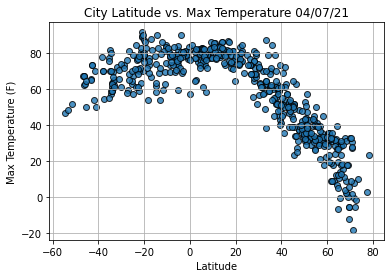

In [32]:
#Import the time module
import time

#Build the scatter plot for latitude vs max temperature
plt.scatter(lats,max_temps,edgecolor = 'black',linewidths=1,marker='o',alpha=0.8,label='Cities')

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature '+time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig1.png')

#Show plot
plt.show()

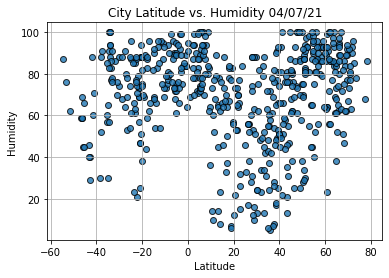

In [33]:
#Build the scatter plot for latitude vs. humidity
plt.scatter(lats,humidity,edgecolor = 'black',label = 'Cities',linewidths=1,marker = 'o',alpha = 0.8)

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ' +time.strftime('%x'))
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig2.png')

#Show plot
plt.show()

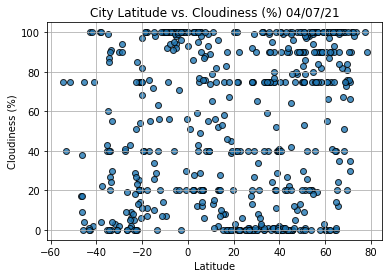

In [35]:
#Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,cloudiness,edgecolor = 'black',label = 'Cities',linewidths=1,marker = 'o',alpha = 0.8)

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (%) ' +time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig3.png')

#Show plot
plt.show()

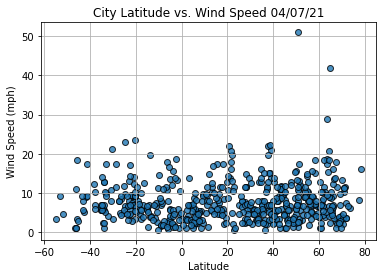

In [36]:
#Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,wind_speed,edgecolor = 'black',label = 'Cities',linewidths=1,marker = 'o',alpha = 0.8)

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ' +time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig2.png')

#Show plot
plt.show()